# Exercício sobre detecção de peças de roupa

Neste exercício, você deve criar um modelo de rede neural para **classificação de imagens de roupas**.

Use otimização hiperparamétrica para encontrar um boa arquitetura para o modelo.

**OBS**.: Não se esqueça de ativar o uso de GPU.

### Nome: Hyago Vieira Lemes Barbosa Silva
### Matrícula: 922

## Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Instalando o KerasTuner.
!pip install keras-tuner --upgrade

# Importanda a biblioteca KerasTuner.
import keras_tuner, kerastuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.7 MB/s eta 0:00:00
Using TensorFlow backend


<ipython-input-1-edd8608c9901>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import keras_tuner, kerastuner as kt


## Importando a base de dados Fashion MNIST

Este exercício usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70.000 imagens em tons de cinza divididas em 10 categorias (ou classes).

As imagens são arrays NumPy de dimensão $28 \times 28$ pixels. Os pixels têm valores inteiros entre 0 to 255. Os rótulos (i.e., *labels*) estão em uma array de inteiros e estão no intervalo de 0 a 9.

O número do rótulo corresponde à classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem contém um único objeto (i.e., uma peça de roupa) e, portanto, é mapeada em um só *rótulo*.

As imagens mostram **peças de roupa** com baixa resolução (28 por 28 pixels), como vemos abaixo.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Usaremos 60.000 imagens para treinar nossa rede neural e 10.000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens.

Nós podemos acessar a base de dados *Fashion MNIST* diretamente do TensorFlow através da função `fashion_mnist.load_data()` do módulo `datasets`.

Importe e carregue a base Fashion MNIST com o código abaixo.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("Dimensão das imagens de treinamento:", X_train.shape)
print("Dimensão dos rótulos de treinamento:", y_train.shape)
print("Dimensão das imagens de teste:", X_test.shape)
print("Dimensão dos rótulos de teste:", y_test.shape)

Dimensão das imagens de treinamento: (60000, 28, 28)
Dimensão dos rótulos de treinamento: (60000,)
Dimensão das imagens de teste: (10000, 28, 28)
Dimensão dos rótulos de teste: (10000,)


In [4]:
# As imagens são armazenadas como matrizes.
np.set_printoptions(linewidth=200)
print(X_train[0])
print()
print("Class:", y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

### Parece uma bota, veja a imagem abaixo

Class: 9



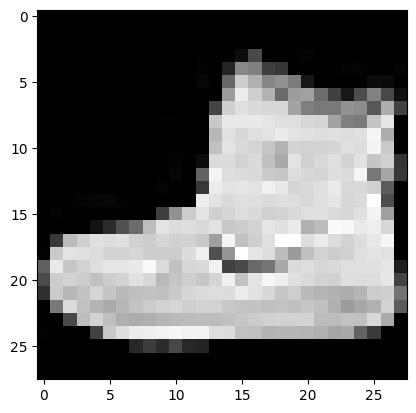

In [5]:
# plot imagem.
plt.imshow(X_train[0], cmap='gray')
print("Class:", y_train[0])
print()

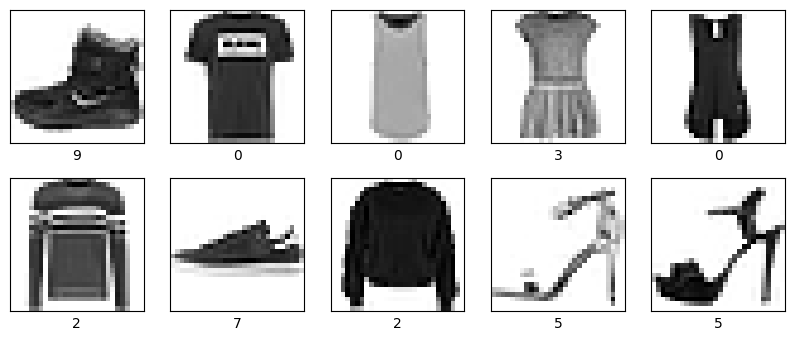

In [6]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='binary') # cmap = 'gray'
    plt.xlabel(y_train[i])

## Dividindo em o conjunto original de treinamento em um conjunto de treinamento menor e um conjunto de validação

### Separamos as primeiras 10.000 imagens para o conjunto de validação.

In [7]:
val_images = X_train[:10000]
val_labels = y_train[:10000]

In [8]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


In [9]:
train_images = X_train[10000:]
train_labels = y_train[10000:]

In [10]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


### Analisando o balanceamento das classes.

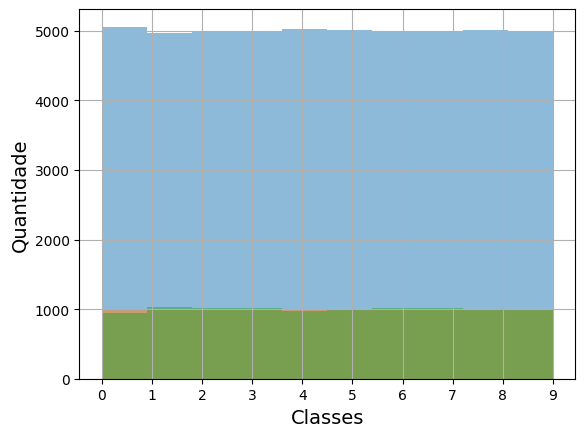

In [11]:
plt.hist(train_labels, alpha=0.5, label='Train')
plt.hist(y_test, alpha=0.5, label='Val')
plt.hist(val_labels, alpha=0.5, label='Test')
plt.xticks(range(10))
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.grid()
plt.show()

**Observação**

As classes estão razoavelmente equilibradas (i.e., balanceadas).

## Pré-processamento dos dados

Vamos aplicar normalização aos dados (i.e., atributos) dos três conjuntos.

Como os valores dos pixels variam entre 0 e 255, basta dividí-los por 255.0 e o intervalo final ficará entre 0.0 e 1.0.

In [12]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = X_test / 255.0

In [13]:
np.set_printoptions(linewidth=200)
print(train_images[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

## Definindo e compilando o modelo

**Observação**: ao invés de passar uma **lista** com as camadas, vamos usar o método `add()` da classe `Sequential` para adicionar as camadas

### Modificando os hyperparâmetros para ser feito uma análise sobre melhor modelo

In [14]:
# Defina a função de construção do modelo
def build_model(hp):
    model = tf.keras.Sequential()
    # trabsformando dados multidimensionais em unidimensional
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Número de camadas ocultas aleatoriamente (1, 2 ou 3).
    n_layers = hp.Choice("n_layers", [1,2,3])

    # Opções de número de neurônios para testar.
    num_neurons_options = [5, 10, 15, 20, 25]

    # De acordo com a quantidade aleatória de camadas, escolhendo a quantidade de neurônios para cada e função de ativação
    if(n_layers==1):
        # Selecionando aleatóriamente o número de neurônios na camada oculta
        num_neurons = hp.Choice(f'units', num_neurons_options)
        # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
        model.add(tf.keras.layers.Dense(units=num_neurons, activation="relu"))
    elif(n_layers==2):
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons = hp.Choice(f'units', num_neurons_options)
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons, activation="relu"))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_cam2 = hp.Choice(f'units', num_neurons_options)
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_cam2, activation="relu"))
    elif(n_layers==3):
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons = hp.Choice(f'units', num_neurons_options)
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons, activation="relu"))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_cam2 = hp.Choice(f'units', num_neurons_options)
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_cam2 = hp.Choice(f'units', num_neurons_options)
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_cam2, activation="relu"))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_cam3 = hp.Choice(f'units', num_neurons_options)
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_cam3, activation="relu"))

    # Saída com as 10 classes com softmax analisando a probalilidade dos valores
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    # Escolhendo aleatóriamente passo de aprendizagem
    learning_rate = hp.Choice("learning_rate", [0.07, 0.1, 0.05])
    # Compilando com análise da accurácia e usando para classificação de imagem sparse categorical crossentropy
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [15]:
from kerastuner.tuners import RandomSearch
import kerastuner
import keras_tuner
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=20,  # Número de tentativas
    directory='./untitled_project',  # Diretório para salvar os resultados
    project_name='my_project'  # Nome do projeto
)


In [16]:
result = tuner.search(
    train_images, train_labels,
    epochs=35,
    validation_data=(val_images, val_labels)
)

Trial 20 Complete [00h 03m 09s]
accuracy: 0.9069799780845642

Best accuracy So Far: 0.9171800017356873
Total elapsed time: 01h 11m 42s


In [22]:
tuner.results_summary()

Results summary
Results in ./untitled_project/my_project
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 14 summary
Hyperparameters:
n_layers: 2
units: 25
learning_rate: 0.05
Score: 0.9171800017356873

Trial 17 summary
Hyperparameters:
n_layers: 2
units: 25
learning_rate: 0.1
Score: 0.916379988193512

Trial 01 summary
Hyperparameters:
n_layers: 3
units: 25
learning_rate: 0.07
Score: 0.9158400297164917

Trial 15 summary
Hyperparameters:
n_layers: 2
units: 25
learning_rate: 0.07
Score: 0.9154199957847595

Trial 02 summary
Hyperparameters:
n_layers: 1
units: 25
learning_rate: 0.07
Score: 0.9102399945259094

Trial 19 summary
Hyperparameters:
n_layers: 2
units: 20
learning_rate: 0.05
Score: 0.9069799780845642

Trial 16 summary
Hyperparameters:
n_layers: 1
units: 20
learning_rate: 0.05
Score: 0.9022799730300903

Trial 05 summary
Hyperparameters:
n_layers: 3
units: 15
learning_rate: 0.05
Score: 0.9012600183486938

Trial 04 summary
Hyperparameters:
n_layers: 1
units: 

## Treinando com modelo específico aleatório testando com parâmetros pré-configurados, de acordo com o resultado das melhores medições feitas acima, e com outras pesquisas, para um modelo melhor, normalmente, a camada interna, é interessante que tenha mais camadas, pois veja a accurácia aumenta caso o número de neurônios internos seja maior. E sobre a camada final tem que ter uma porcentagem para cada uma das 10 classes por isso alguns requisitos foram usados como foi analisado acima


In [54]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [63]:
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels)
    )

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2125 - accuracy: 0.9210 - val_loss: 0.3000 - val_accuracy: 0.8925
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2043 - accuracy: 0.9250 - val_loss: 0.2954 - val_accuracy: 0.8917
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1995 - accuracy: 0.9252 - val_loss: 0.2973 - val_accuracy: 0.8940
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1932 - accuracy: 0.9273 - val_loss: 0.2944 - val_accuracy: 0.8916
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1874 - accuracy: 0.9295 - val_loss: 0.2950 - val_accuracy: 0.8953
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1826 - accuracy: 0.9326 - val_loss: 0.2928 - val_accuracy: 0.8963
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1781 - accuracy: 0.9339 - val_loss: 0.3094 - val_accura

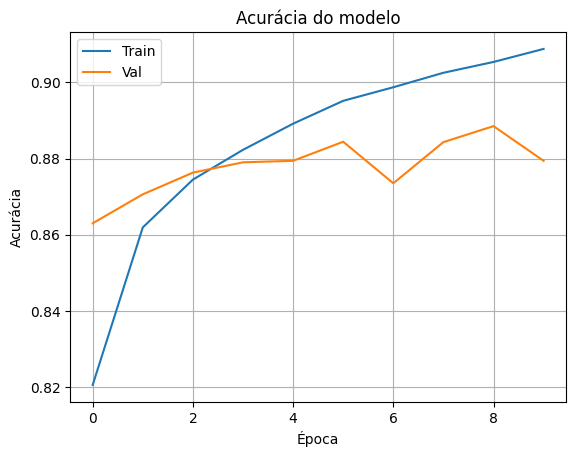

In [59]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

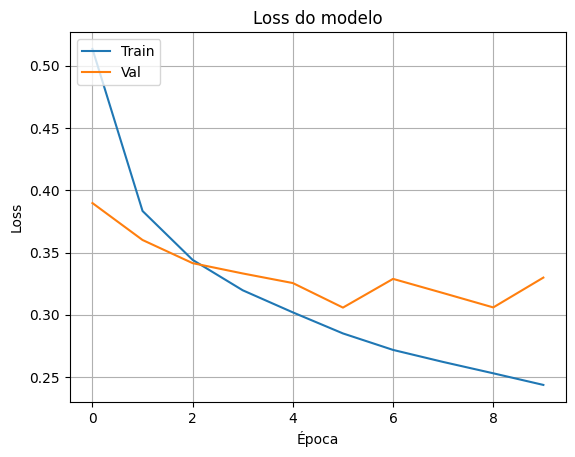

In [60]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss do modelo')
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

###  Adicionando uma camada convolucional ao modelo, e algumas modificações. Esta camada convolucional possui ativação relu, e uma camada de maxpool para obter o maior valor após esta convolução. Apos isso tornamos a dimensão unidimentcional, e fazemos o uso das mesmas camadas que estava anteriormente

In [170]:
model_two = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_two.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 10816)             0         
                                                                 
 dense_31 (Dense)            (None, 128)               1384576   
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
___________________________________________

In [171]:
model_two.compile(
    optimizer="adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [172]:
history_two = model_two.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(val_images,val_labels)
)

Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 0.3891 - accuracy: 0.8629 - val_loss: 0.2982 - val_accuracy: 0.8942
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.2636 - accuracy: 0.9041 - val_loss: 0.2643 - val_accuracy: 0.9030
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.2155 - accuracy: 0.9200 - val_loss: 0.2469 - val_accuracy: 0.9073
Epoch 4/5
1563/1563 [==============================] - 78s 50ms/step - loss: 0.1809 - accuracy: 0.9323 - val_loss: 0.2550 - val_accuracy: 0.9062
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.1503 - accuracy: 0.9450 - val_loss: 0.2809 - val_accuracy: 0.9016


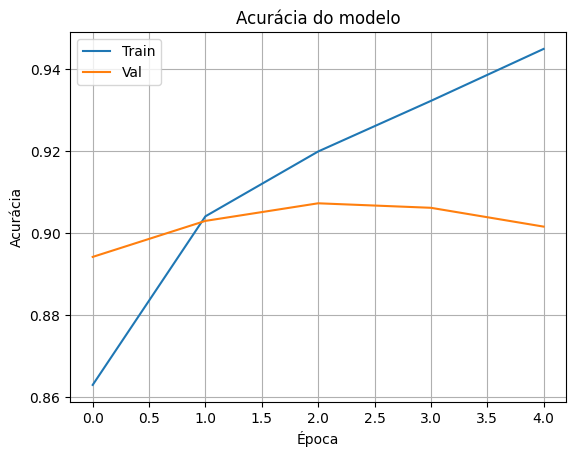

In [173]:
plt.plot(history_two.history['accuracy'], label='Train')
plt.plot(history_two.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

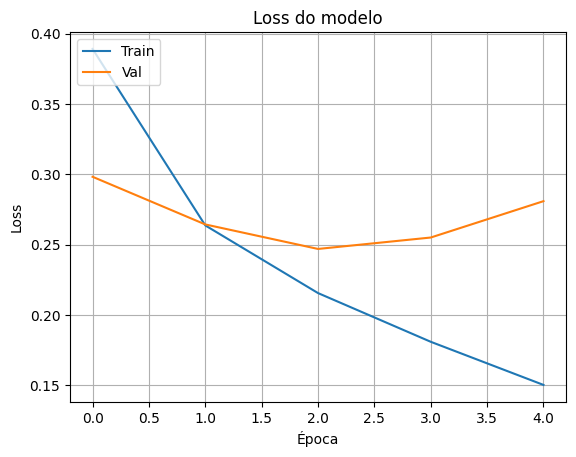

In [174]:
plt.plot(history_two.history['loss'], label='Train')
plt.plot(history_two.history['val_loss'], label='Val')
plt.title('Loss do modelo')
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Testando os modelos treinado nos três conjuntos

- model (primeiro modelo)
- model_two (segundo modelo)


In [184]:
model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9559


[0.12120531499385834, 0.9559000134468079]

In [185]:
model_two.evaluate(train_images, train_labels)

1563/1563 [==============================] - 19s 12ms/step - loss: 0.1591 - accuracy: 0.9391


[0.1590990424156189, 0.939079999923706]

In [186]:
model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8943


[0.3460458219051361, 0.8942999839782715]

In [187]:
model_two.evaluate(val_images, val_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.2809 - accuracy: 0.9016


[0.2808619737625122, 0.9016000032424927]

In [188]:
model.evaluate(test_images, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8927


[0.37491703033447266, 0.8927000164985657]

In [189]:
model_two.evaluate(test_images, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2992 - accuracy: 0.8985


[0.2991560995578766, 0.8985000252723694]

In [190]:
predictions_model = model.predict(test_images)
print(predictions_model[0])

313/313 [==============================] - 1s 2ms/step
[8.7066987e-10 5.5022909e-12 5.4585787e-11 2.5152366e-10 2.1811815e-14 2.7318404e-07 1.4481055e-10 1.9704681e-04 7.1492048e-09 9.9980259e-01]


In [191]:
predictions_model_two = model_two.predict(test_images)
print(predictions_model_two[0])

313/313 [==============================] - 5s 15ms/step
[4.7931844e-06 1.7361758e-07 1.4650376e-06 7.6397924e-07 6.7211687e-08 4.6325320e-05 1.0184880e-06 1.6445766e-03 4.3005446e-07 9.9830031e-01]


### Analisando os erros

In [196]:
classifications_model = model.predict(X_test)
print(classifications_model[0])
print("Predicted class: ", np.argmax(classifications_model[0]))    # retorna índice de probabilidade máxima
print("The actual class: ", y_test[0])

313/313 [==============================] - 1s 3ms/step
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.99999994]
Predicted class:  9
The actual class:  9


In [197]:
classifications_model_two = model_two.predict(X_test)
print(classifications_model_two[0])
print("Predicted class: ", np.argmax(classifications_model_two[0]))    # retorna índice de probabilidade máxima
print("The actual class: ", y_test[0])

313/313 [==============================] - 5s 16ms/step
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.99999994]
Predicted class:  9
The actual class:  9


### Veja abaixo quea quantidade de erro que obteve sobre as classes do modelo 1 para modelo 2 foi bem menor, 182 classes certas a mais do que o modelo 1, o modelo 2 obteve

In [212]:
classes_model = np.argmax(classifications_model, axis=1)
different_indices_modelo = np.where(classes_model != y_test)
print(different_indices_modelo[0])

print(len(different_indices_modelo[0]))

[  12   17   23 ... 9977 9985 9991]
1324


In [213]:
classes_model_two = np.argmax(classifications_model_two, axis=1)
different_indices_modelo_two = np.where(classes_model_two != y_test)
print(different_indices_modelo_two[0])

print(len(different_indices_modelo_two[0]))

[  12   17   23 ... 9977 9985 9991]
1142


### Algumas delas abaixo mostrando Rótulo da imagem, o que ela espera como classificação e o que ela obteve

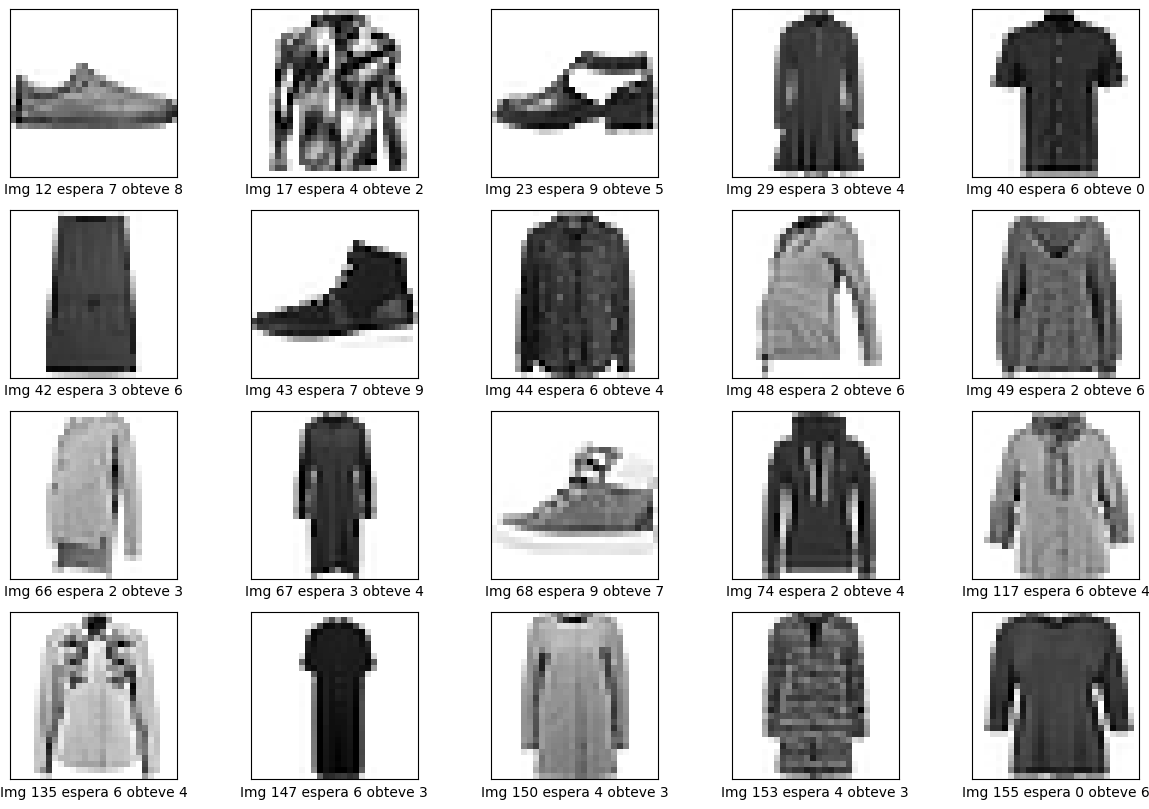

In [262]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[different_indices_modelo[0][i]], cmap='binary') # cmap = 'gray'
    plt.xlabel("Img {} espera {} obteve {}".format(different_indices_modelo[0][i], y_test[different_indices_modelo[0][i]],classes_model[different_indices_modelo[0][i]]))

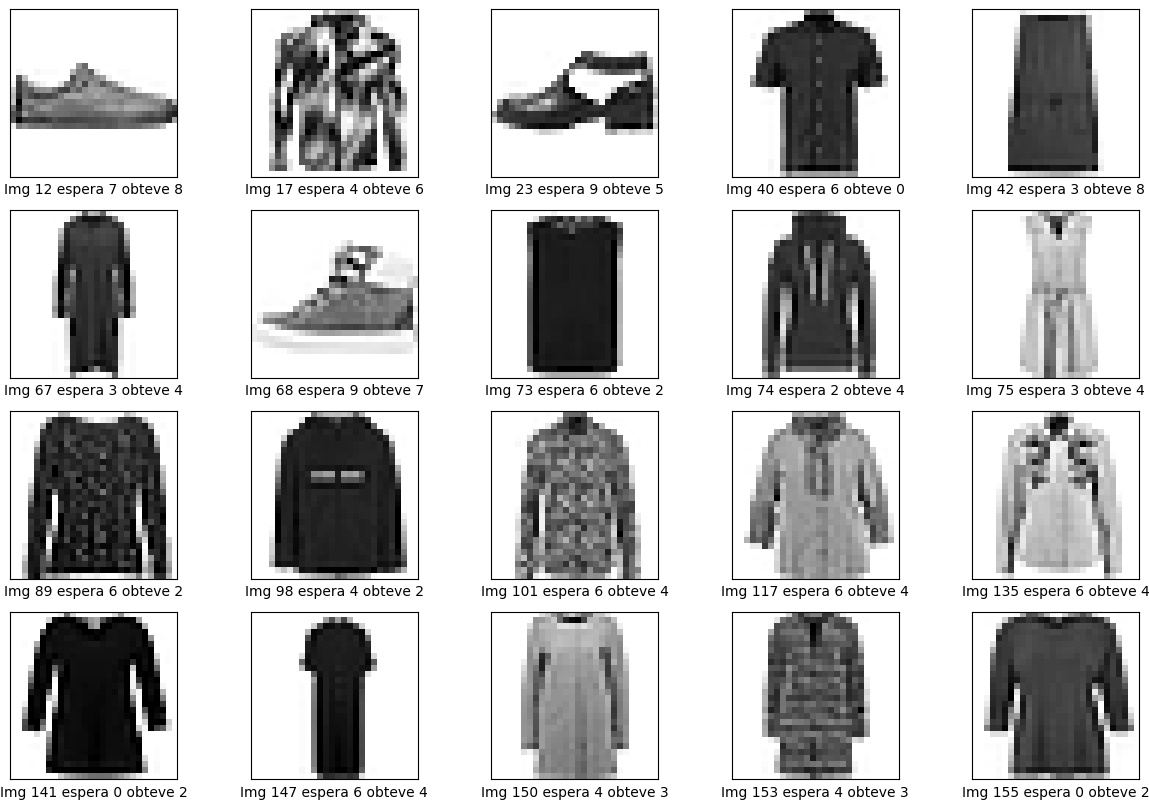

In [263]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[different_indices_modelo_two[0][i]], cmap='binary') # cmap = 'gray'
    plt.xlabel("Img {} espera {} obteve {}".format(different_indices_modelo_two[0][i], y_test[different_indices_modelo_two[0][i]],classes_model_two[different_indices_modelo_two[0][i]]))